# 现在我们有全球排名靠前的10000本书的数据，那么请统计一下下面几个问题：
### 1.不同年份书的数量

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np

In [2]:
file_path = './books.csv'

In [3]:
df = pd.read_csv(file_path)
print(df.head(1))


   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   

           authors  original_publication_year    original_title  ...  \
0  Suzanne Collins                     2008.0  The Hunger Games  ...   

  ratings_count work_ratings_count  work_text_reviews_count  ratings_1  \
0       4780653            4942365                   155254      66715   

   ratings_2  ratings_3  ratings_4  ratings_5  \
0     127936     560092    1481305    2706317   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  

[1 rows x 23 columns]


In [4]:
# print(df.info())

In [5]:
data1 = df[pd.notnull(df['original_publication_year'])]  #取得年份里面所有不为nan的内容
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 0 to 9999
Data columns (total 23 columns):
id                           9979 non-null int64
book_id                      9979 non-null int64
best_book_id                 9979 non-null int64
work_id                      9979 non-null int64
books_count                  9979 non-null int64
isbn                         9282 non-null object
isbn13                       9397 non-null float64
authors                      9979 non-null object
original_publication_year    9979 non-null float64
original_title               9409 non-null object
title                        9979 non-null object
language_code                8900 non-null object
average_rating               9979 non-null float64
ratings_count                9979 non-null int64
work_ratings_count           9979 non-null int64
work_text_reviews_count      9979 non-null int64
ratings_1                    9979 non-null int64
ratings_2                    9979 non-null int64


In [45]:
grouped = data1.groupby(by='original_publication_year').count()['id'].sort_index(ascending=False).head(50)
# print(grouped)

In [24]:
_x = grouped.index
_y = grouped.values

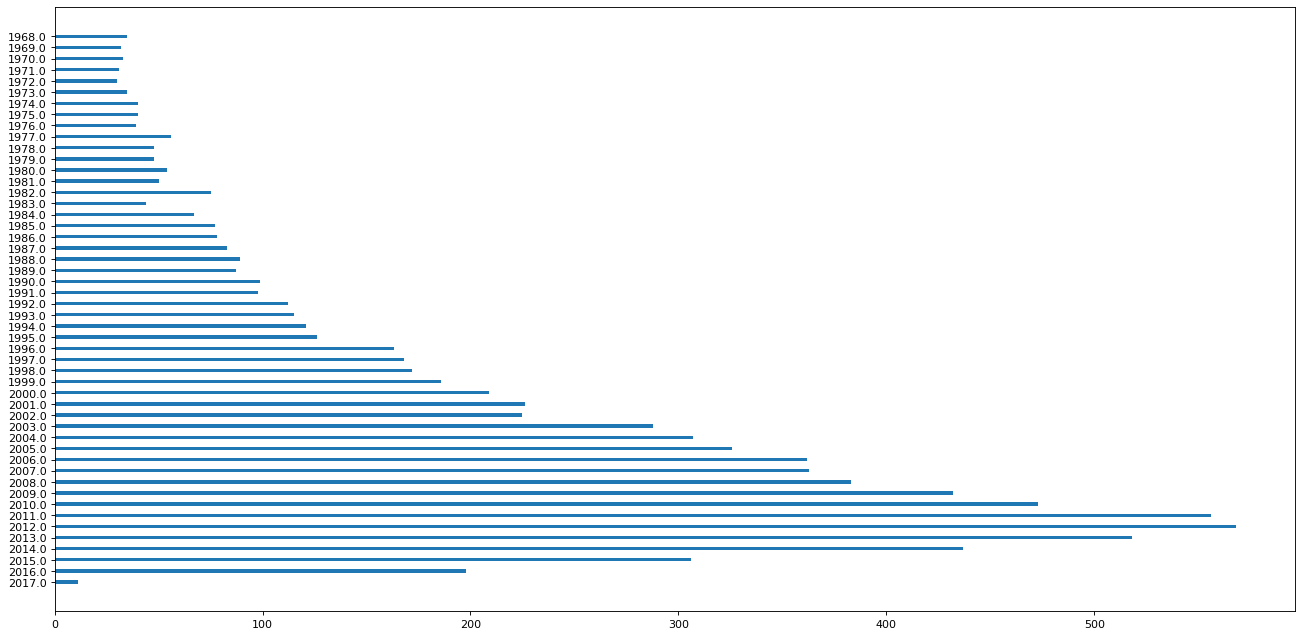

In [25]:
plt.figure(figsize=(20,10),dpi=80)
plt.barh(range(len(_x)),_y,height = 0.3)
plt.yticks(range(len(_x)),_x)
plt.show()

### 2.不同年份书的平均评分情况

In [31]:
grouped1 = data1['average_rating'].groupby(by=data1['original_publication_year']).mean()
print(grouped1)

original_publication_year
-1750.0    3.630000
-762.0     4.030000
-750.0     4.005000
-720.0     3.730000
-560.0     4.050000
             ...   
 2013.0    4.012297
 2014.0    3.985378
 2015.0    3.954641
 2016.0    4.027576
 2017.0    4.100909
Name: average_rating, Length: 293, dtype: float64


In [32]:
_x = grouped1.index
_y = grouped1.values

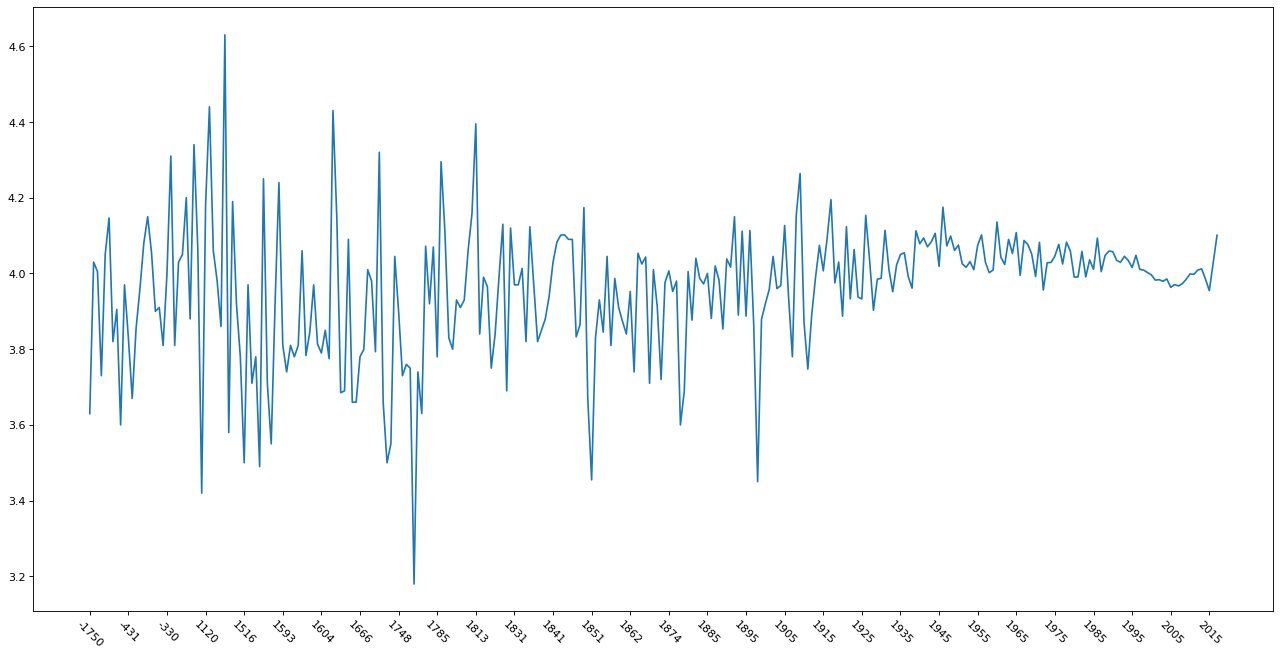

In [44]:
plt.figure(figsize=(20,10),dpi = 80)
plt.plot(range(len(_x)),_y)
plt.xticks(list(range(len(_x)))[::10],_x[::10].astype(int),rotation = 315)
plt.show()